In [50]:
#FINAL

####QUESTIONS####
#altaz = coordinates.AltAz(obstime=times_array, location=position) #what does this do again exactly?? --> Ask Ajay
#might alpha ever need to be customizable?
#angle of panel wrt the vertical --> just confirm?

import math
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()

def get_elevations(num_days, sample, position_lat, position_lon, position_height, utc_value): 
    """returns an array of individual elevation angle arrays corresponding to each day observed by user"""
    position = EarthLocation(lat=position_lat*u.deg, lon=position_lon*u.deg, height=position_height) #location of gondola above wanaka
    utcoffset = utc_value*u.hour #timezone in nz is utc+12; change 12 to user input value "utc_value"
    obstart = Time('2022-5-01 00:00:00') - utcoffset #start of observation in utc time
    days = num_days #for how many days do we want data
    sample_time = sample #sample every [sample_minutes] minutes
    minutes_per_day = 60*24
    sample_rate = sample_time/minutes_per_day #sample period in units of days
    
    #generate an array of num_days number of elements
    #each element is an array of sun elevations for a given day in that range
    elevation_array = []
    for i in range(num_days):
        times_array = obstart + np.arange(0, 24, sample_rate)*u.hour #generate array of sampled times to collect elevation data
        sun = coordinates.get_sun(times_array) #find the coordinate location of the sun
        altaz = coordinates.AltAz(obstime=times_array, location=position) #??? --> Ask Ajay
        sun_alt = sun.transform_to(altaz).alt.to(u.deg).value #find sun altitude (elevation) angles in degrees wrt times array
        sun_alt_pos = np.array(sun_alt[sun_alt>0]) #array storing all the positive elevation angles (strictly after sunrise + before sunset)
        elevation_array.append(sun_alt_pos) #array of +ve elevations becomes an element of the larger array for 1 day out of [num_days] days
        obstart = obstart + 1 #increment day
    
    return elevation_array

def optimize_sum(get_elevations):
    elev = get_elevations #(num_days, sample_minutes, position_lat, position_lon, position_height, utc_value)
    min_val = []
    min_day = []
    for alpha in np.arange(0, 91):
        sum_array = []
        thetas = [] #theta is the incidence angle -> difference between given panel and solar elevation angle
        for day in elev:
            thetas = alpha-np.array(day) #find incident angle
            costhetas = np.cos(thetas*(np.pi/180))
            sum_array.append(np.sum(costhetas)) #array of daily performance (power proxy) sums at a given alpha
        min_val.append(np.min(sum_array))
        min_day.append(np.argmin(sum_array)) #worst day
        
    return min_val, min_day

Text(0, 0.5, 'Worst-Case Performance Integral')

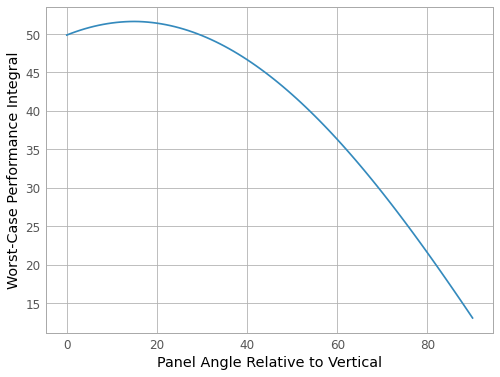

In [51]:
elevation = get_elevations(100, 240, -44, 169, 35000, 12) #wanaka for 100 days, sampling every 4 hours
val, days = optimize_sum(elevation)

plt.plot(np.arange(0, 91), np.array(val)) #plotting alphas against the performance integral
plt.title('')
plt.xlabel('Panel Angle Relative to Vertical')
plt.ylabel('Worst-Case Performance Integral')


In [42]:
np.argmax(val) #day that corresponds to max performance of worst performances

15

In [49]:
np.arange(15,21,0.05)[15] 

15.75000000000001